In [2]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null



In [3]:
ckd_data <- read_csv("https://raw.githubusercontent.com/UBC-DSCI/datasets/master/chronic_kidney_disease/chronic_kidney_disease_full.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.


In [5]:
summary(ckd_data)

      age             bp              sg              al       
 Min.   : 3.0   Min.   : 50.0   Min.   :1.005   Min.   :0.000  
 1st Qu.:42.0   1st Qu.: 70.0   1st Qu.:1.015   1st Qu.:0.000  
 Median :54.5   Median : 80.0   Median :1.020   Median :0.000  
 Mean   :51.7   Mean   : 76.5   Mean   :1.018   Mean   :1.033  
 3rd Qu.:65.0   3rd Qu.: 80.0   3rd Qu.:1.020   3rd Qu.:2.000  
 Max.   :90.0   Max.   :180.0   Max.   :1.025   Max.   :5.000  
 NA's   :9      NA's   :10      NA's   :45      NA's   :44     
       su             rbc                 pc                pcc           
 Min.   :0.0000   Length:379         Length:379         Length:379        
 1st Qu.:0.0000   Class :character   Class :character   Class :character  
 Median :0.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.4548                                                           
 3rd Qu.:0.0000                                                           
 Max.   :5.0000                       

In [4]:
ckd_data <- ckd_data %>% filter(sc < 20)
ckd_data

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd
24,NA,1.015,2,4,normal,abnormal,notpresent,notpresent,410,⋯,44,6900,5.0,no,yes,no,good,yes,no,ckd
52,100,1.015,3,0,normal,abnormal,present,notpresent,138,⋯,33,9600,4.0,yes,yes,no,good,no,yes,ckd
53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,⋯,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
50,60,1.010,2,4,NA,abnormal,present,notpresent,490,⋯,28,NA,NA,yes,yes,no,good,no,yes,ckd


In [19]:
colnames(ckd_data)[colnames(ckd_data)=="class"] <- "ds"
ckd_data <- ckd_data %>% select(bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds)
head(ckd_data)

bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
121,36,1.2,NA,NA,15.4,5.2,7800,ckd
NA,18,0.8,NA,NA,11.3,NA,6000,ckd
423,53,1.8,NA,NA,9.6,NA,7500,ckd
117,56,3.8,111,2.5,11.2,3.9,6700,ckd
106,26,1.4,NA,NA,11.6,4.6,7300,ckd
74,25,1.1,142,3.2,12.2,4.4,7800,ckd


blood glc(bgr), blood urea(bu), serum creatinine(sc), sodium(sod), potassium(pot), Hb(hemo), RBC counts(rc), WBC counts(wc)

Warning message:
“Removed 3 rows containing missing values (geom_point).”

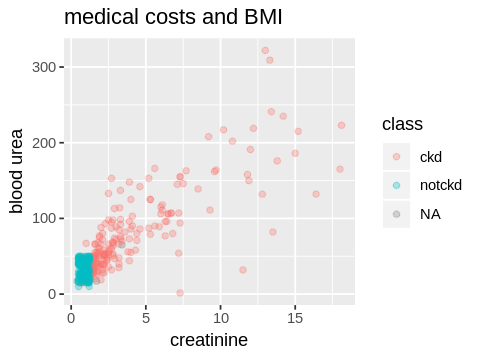

In [22]:
options(repr.plot.width = 4, repr.plot.height = 3)
plot_1 <- ckd_data %>%
    ggplot(aes(x = sc, y =  bu)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
        xlab("creatinine") +
        ylab("blood urea") +
        labs(color = "class")+
        ggtitle("medical costs and BMI")
plot_1

Warning message:
“Removed 32 rows containing missing values (geom_point).”

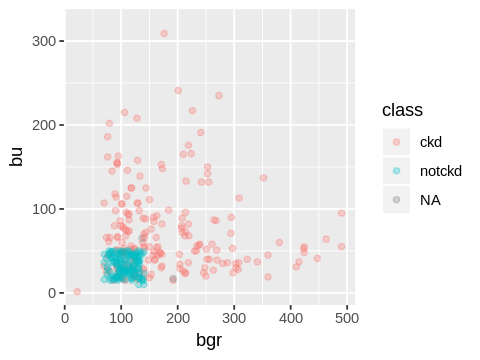

In [24]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bgr, y =  bu)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 31 rows containing missing values (geom_point).”

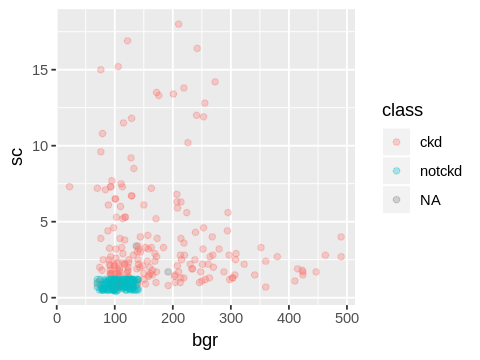

In [25]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_3 <- ckd_data %>%
    ggplot(aes(x = bgr, y =  sc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_3

Warning message:
“Removed 86 rows containing missing values (geom_point).”

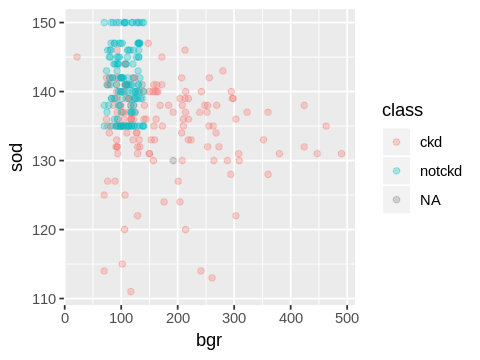

In [26]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bgr, y =  sod)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 14 rows containing missing values (geom_point).”

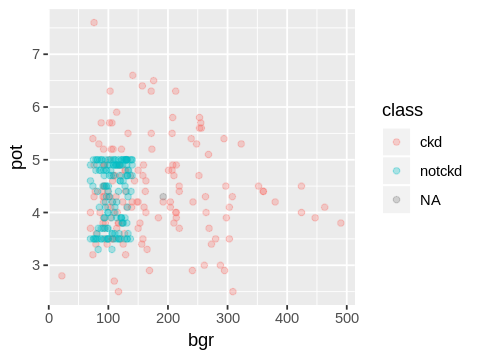

In [28]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    filter(pot < 10) %>%
    ggplot(aes(x = bgr, y =  pot)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 72 rows containing missing values (geom_point).”

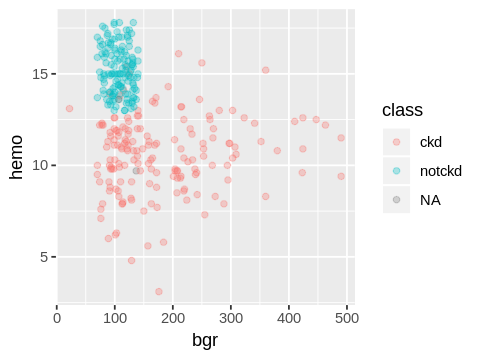

In [29]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bgr, y =  hemo)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 128 rows containing missing values (geom_point).”

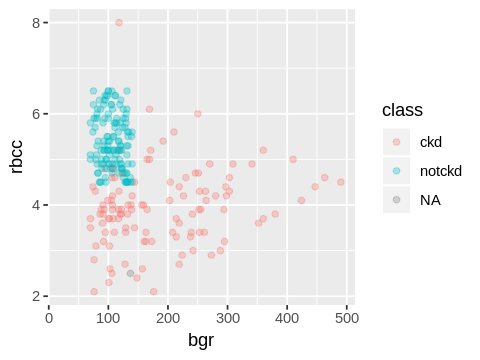

In [30]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bgr, y =  rbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 115 rows containing missing values (geom_point).”

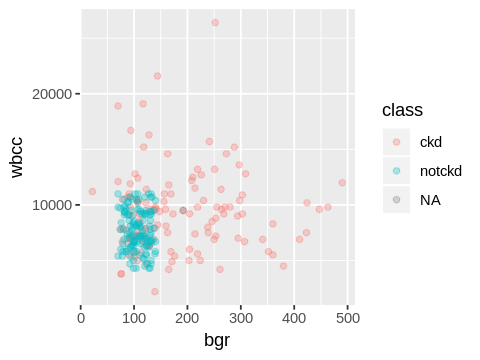

In [31]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bgr, y =  wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 3 rows containing missing values (geom_point).”

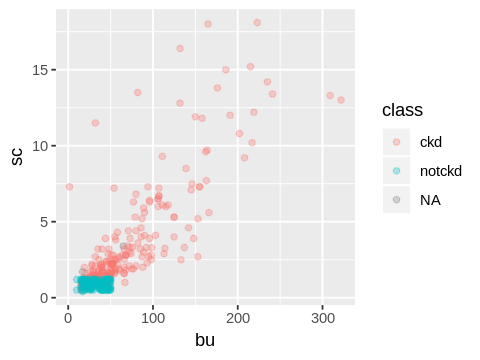

In [32]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bu, y = sc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 75 rows containing missing values (geom_point).”

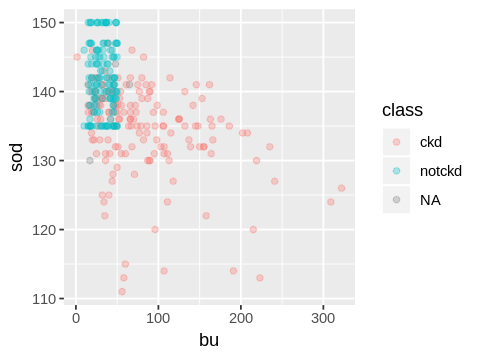

In [33]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bu, y = sod)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 75 rows containing missing values (geom_point).”

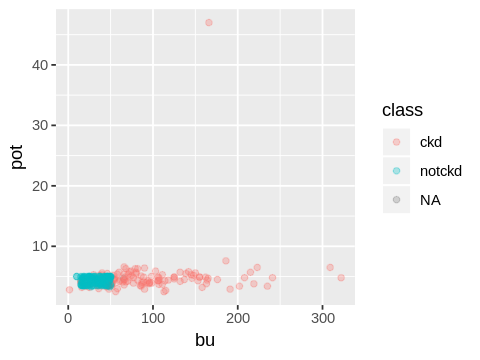

In [34]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bu, y = pot)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 47 rows containing missing values (geom_point).”

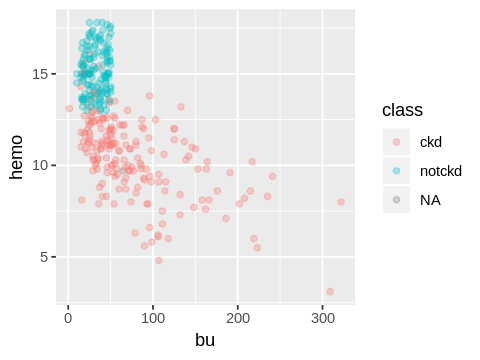

In [35]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bu, y = hemo)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 120 rows containing missing values (geom_point).”

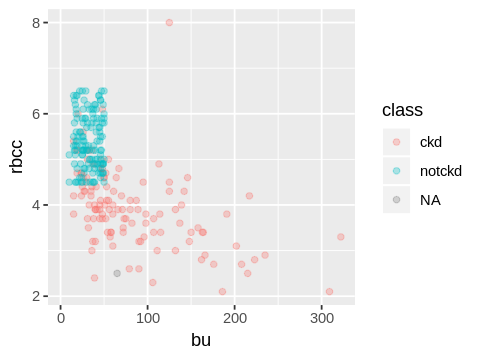

In [36]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bu, y = rbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 100 rows containing missing values (geom_point).”

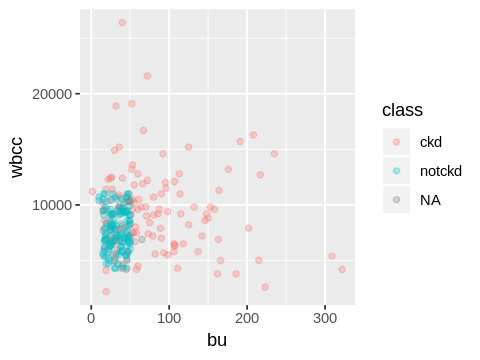

In [38]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = bu, y = wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 72 rows containing missing values (geom_point).”

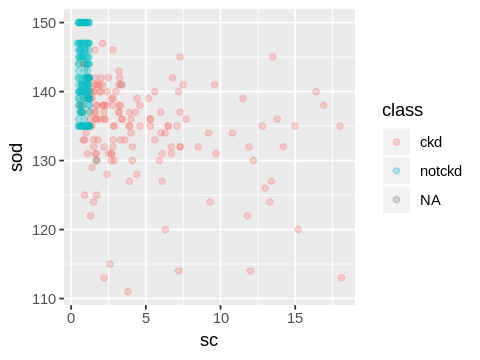

In [39]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sc, y = sod)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 72 rows containing missing values (geom_point).”

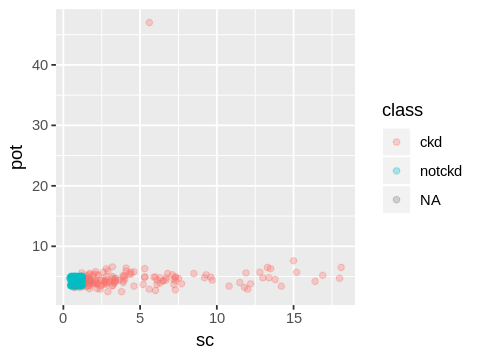

In [40]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sc, y = pot)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 44 rows containing missing values (geom_point).”

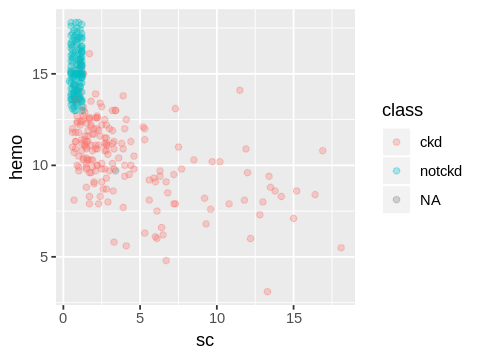

In [41]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sc, y = hemo)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 117 rows containing missing values (geom_point).”

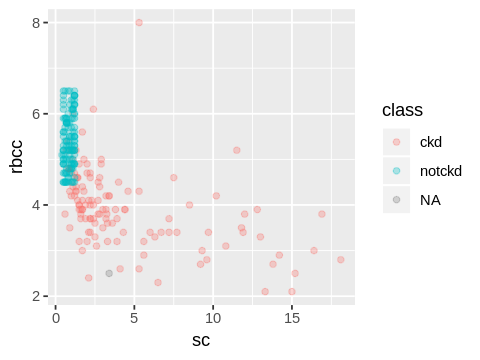

In [42]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sc, y = rbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 97 rows containing missing values (geom_point).”

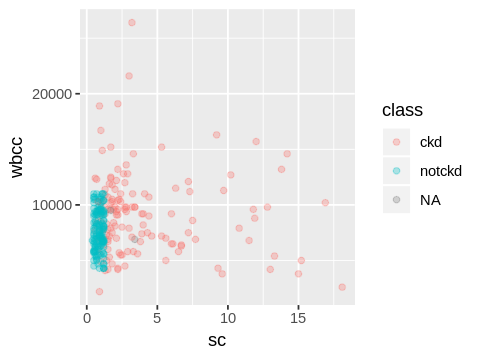

In [43]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sc, y = wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 72 rows containing missing values (geom_point).”

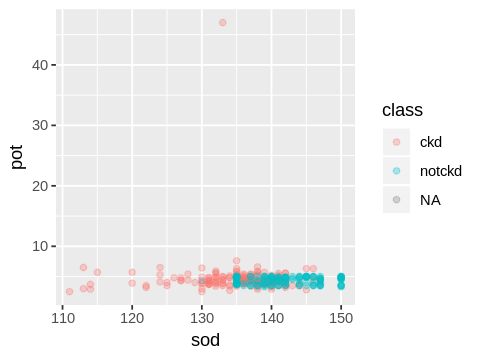

In [45]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sod, y = pot)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 102 rows containing missing values (geom_point).”

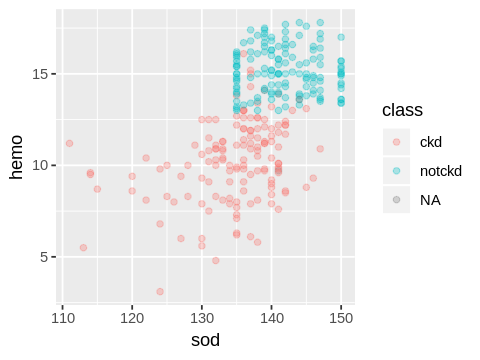

In [47]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sod, y = hemo)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 144 rows containing missing values (geom_point).”

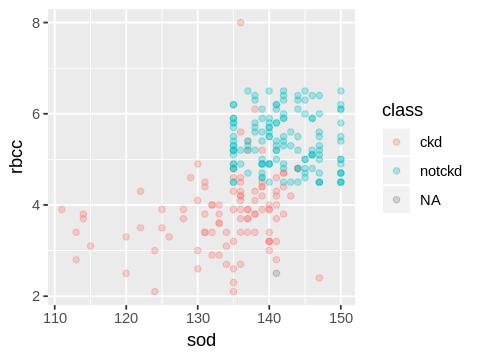

In [48]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sod, y = rbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 138 rows containing missing values (geom_point).”

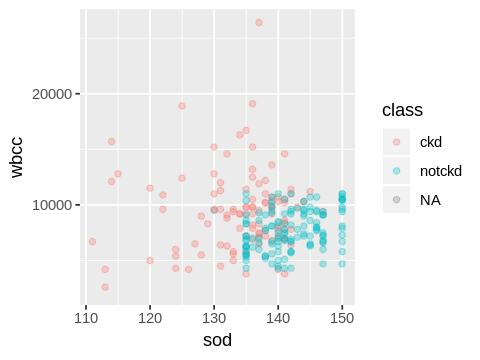

In [50]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = sod, y = wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 30 rows containing missing values (geom_point).”

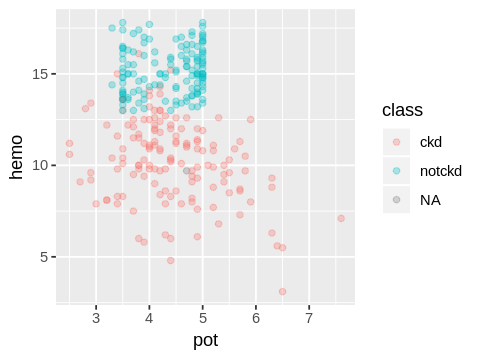

In [58]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    filter(pot < 10) %>% 
    ggplot(aes(x = pot, y = hemo)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 72 rows containing missing values (geom_point).”

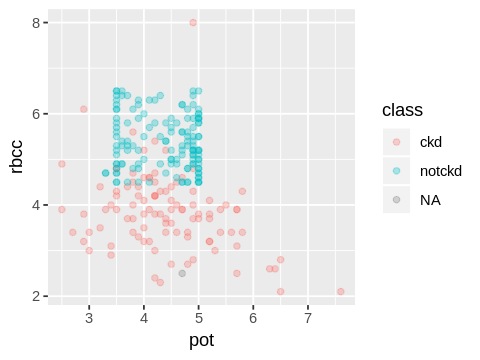

In [59]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    filter(pot < 10) %>%
    ggplot(aes(x = pot, y = rbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 66 rows containing missing values (geom_point).”

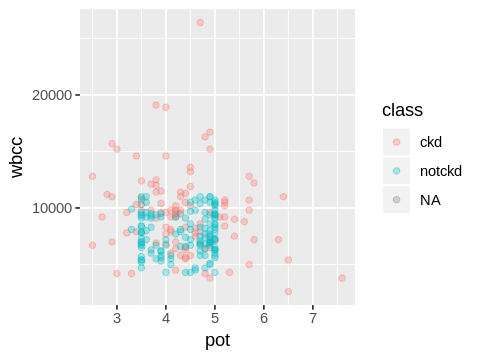

In [60]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
filter(pot < 10) %>%
    ggplot(aes(x = pot, y = wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 121 rows containing missing values (geom_point).”

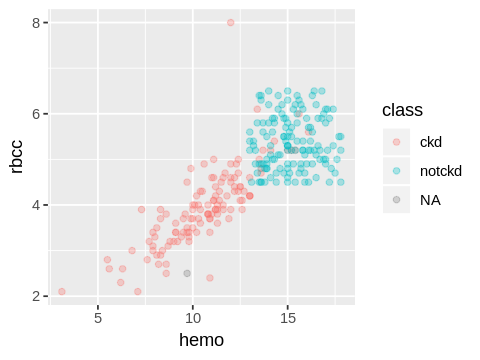

In [54]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = hemo, y = rbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 102 rows containing missing values (geom_point).”

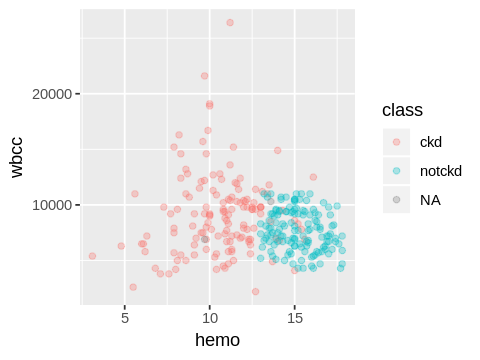

In [55]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = hemo, y = wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2

Warning message:
“Removed 120 rows containing missing values (geom_point).”

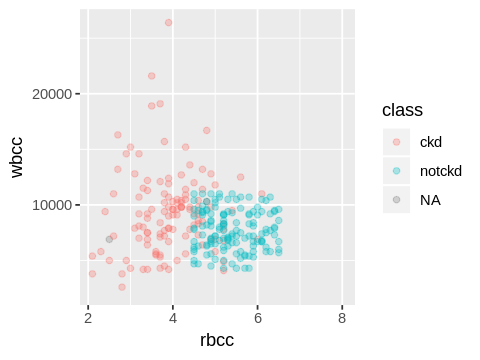

In [57]:
#bgr,bu,sc,sod,pot,hemo,rbcc,wbcc,ds
plot_2 <- ckd_data %>%
    ggplot(aes(x = rbcc, y = wbcc)) + 
        geom_point(aes(group = ds, color = ds), alpha = 0.3) + 
        labs(color = "class")
plot_2